In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import gc
import xarray as xr
import pandas as pd
import xrft as xrft
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter as gauss
from scipy.integrate import trapezoid as trapz
from pyspec import spectrum as spec
from matplotlib.colors import LogNorm
import warnings
import scipy.integrate as integ
warnings.filterwarnings("ignore")

In [2]:
path='/data/pacific/lrenault/SASI/CROCO/FULL/'
listm=glob(path+'surf*.nc');listm.sort()
# varf=xr.open_dataset(listm[-9:][xmon])
varf=xr.open_mfdataset(listm)

path='/data/pacific/lrenault/SASI/CROCO/SMTH/'
listt=glob(path+'surf*SASI_6h_his_20*_*.nc');listt.sort()
listt.append('/data/pacific/lrenault/SASI/CROCO/SMTH/surf_SASI_6h_his_2012-07.nc')
#vart=xr.open_dataset(listt[xmon])
vart=xr.open_mfdataset(listt)

In [3]:
plt.rcParams['font.size']=15
plt.rcParams['font.sans-serif']='Arial'
plt.rcParams['font.weight']='bold'

In [4]:
dxx=111*(np.diff(varf['nav_lat_rho'][:,0]).mean() +np.diff(varf['nav_lon_rho'][0,:]).mean())/2
# dxx=0.00485*111

## Tests

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


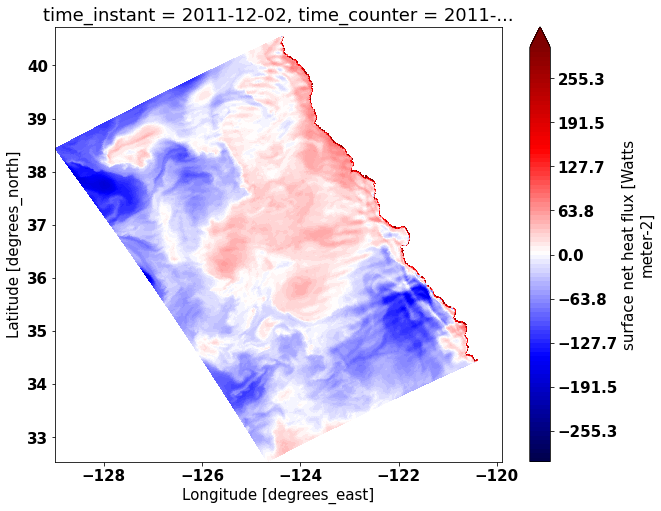

In [5]:
plt.figure(figsize=(10,8))
varf.shflx[3,:,:].plot(x="nav_lon_rho",y="nav_lat_rho",cmap='seismic',levels=np.linspace(-300,300,95))

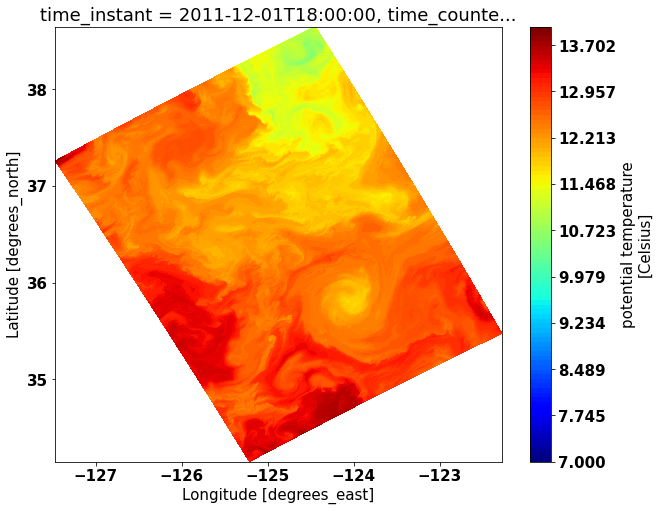

In [6]:
plt.figure(figsize=(10,8))
varf.temp[2,360:-360,90:700].plot(x="nav_lon_rho",y="nav_lat_rho",cmap='jet',levels=np.linspace(7,14,95))

In [ ]:
hf=varf.shflx.groupby("time_counter.dayofyear").mean()[:,100:-100,90:700] 
ht=vart.shflx.groupby("time_counter.dayofyear").mean()[:,100:-100,90:700] 


exspec=xrft.isotropic_power_spectrum(hf[0].drop(['nav_lat_rho','nav_lon_rho']),nfactor=4,truncate='True',detrend='linear', window=True)

Hf=np.zeros([hf.shape[0],exspec.shape[0]])*np.nan;
Ht=np.zeros([ht.shape[0],exspec.shape[0]])*np.nan;

for ixx in range(hf.shape[0]):
    hpf=xrft.isotropic_power_spectrum(hf[ixx].drop(['nav_lat_rho','nav_lon_rho']),nfactor=4,truncate='True',detrend='linear', window=True)
    hpt=xrft.isotropic_power_spectrum(ht[ixx].drop(['nav_lat_rho','nav_lon_rho']),nfactor=4,truncate='True',detrend='linear', window=True)

    Hf[ixx,:]=(hpf.to_numpy())
    Ht[ixx,:]=(hpt.to_numpy())

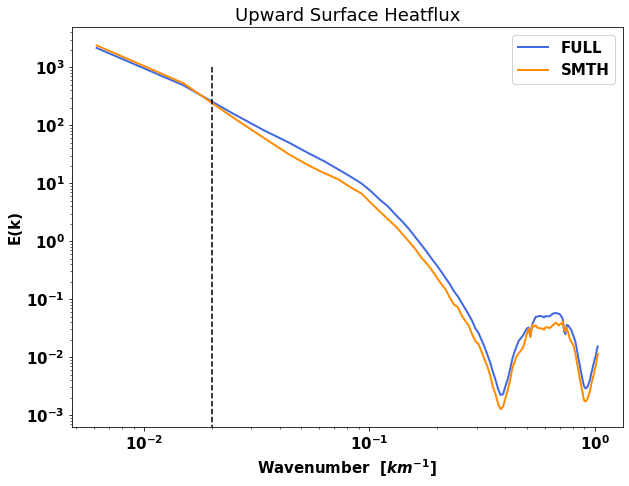

In [173]:

plt.figure(figsize=(9,7))


plt.plot(exspec.freq_r/dxx,np.nanmean(Hf,axis=0),label='FULL',linewidth=2,color='royalblue')


plt.plot(exspec.freq_r/dxx,np.nanmean(Ht,axis=0),label='SMTH',linewidth=2,color='darkorange')

plt.plot([1/50,1/50],[1000,0],'k--')




plt.legend()

plt.yscale('log')
plt.xscale('log')


# plt.grid()
# plt.title('Full Period {0}'.format(varr))
# plt.xlim(-5,-3)
# plt.xticks(np.array([-2,-1]),[r'10$^{-2}$',r'10$^{-1}$'])
# plt.yticks(np.array([-3,-1,1,3,6]),[r'10$^{-3}$',r'10$^{-1}$',r'10$^{1}$',r'10$^{3}$',r'10$^{6}$'])


plt.title('Upward Surface Heatflux')
plt.xlabel(r'Wavenumber  $[km^{-1}]$',fontweight='bold')
plt.ylabel(r'E(k)',fontweight='bold')

# plt.xlim(1/100,1/3)
# plt.ylim(0.001,1000)
plt.tight_layout()

In [210]:
varf['temp'].groupby("time_counter.dayofyear").mean()

<xarray.DataArray 'temp' (dayofyear: 245, y_rho: 1520, x_rho: 1000)>
dask.array<stack, shape=(245, 1520, 1000), dtype=float32, chunksize=(1, 1520, 1000), chunktype=numpy.ndarray>
Coordinates:
    nav_lat_rho  (y_rho, x_rho) float32 dask.array<chunksize=(1520, 1000), meta=np.ndarray>
    nav_lon_rho  (y_rho, x_rho) float32 dask.array<chunksize=(1520, 1000), meta=np.ndarray>
  * dayofyear    (dayofyear) int64 1 2 3 4 5 6 7 ... 359 360 361 362 363 364 365
Dimensions without coordinates: y_rho, x_rho

In [10]:
tf=varf.temp.groupby("time_counter.dayofyear").mean()[:,100:-100,90:700] 
tt=vart.temp.groupby("time_counter.dayofyear").mean()[:,100:-100,90:700] 


exspec=xrft.isotropic_powerspectrum(tf[0].drop(['nav_lat_rho','nav_lon_rho']),nfactor=4,truncate='True',detrend='linear', window=True)

Tf=np.zeros([tf.shape[0],exspec.shape[0]])*np.nan;
Tt=np.zeros([tt.shape[0],exspec.shape[0]])*np.nan;

for ixx in range(tf.shape[0]):
    tpf=xrft.isotropic_power_spectrum(tf[ixx].drop(['nav_lon_rho','nav_lat_rho']),nfactor=4,truncate='True',detrend='linear', window=True)
    tpt=xrft.isotropic_power_spectrum(tt[ixx].drop(['nav_lon_rho','nav_lat_rho']),nfactor=4,truncate='True',detrend='linear', window=True)
    Tf[ixx,:]=(tpf.to_numpy())
    Tt[ixx,:]=(tpt.to_numpy())

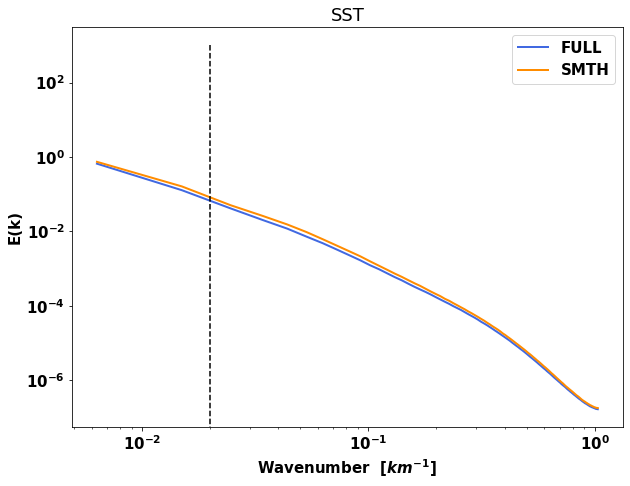

In [11]:

plt.figure(figsize=(9,7))


plt.plot(exspec.freq_r/dxx,np.nanmean(Tf,axis=0),label='FULL',linewidth=2,color='royalblue')


plt.plot(exspec.freq_r/dxx,np.nanmean(Tt,axis=0),label='SMTH',linewidth=2,color='darkorange')

plt.plot([1/50,1/50],[1000,0],'k--')




plt.legend()

plt.yscale('log')
plt.xscale('log')


# plt.grid()
# plt.title('Full Period {0}'.format(varr))
# plt.xlim(-5,-3)
# plt.xticks(np.array([-2,-1]),[r'10$^{-2}$',r'10$^{-1}$'])
# plt.yticks(np.array([-3,-1,1,3,6]),[r'10$^{-3}$',r'10$^{-1}$',r'10$^{1}$',r'10$^{3}$',r'10$^{6}$'])


plt.title('SST')
plt.xlabel(r'Wavenumber  $[km^{-1}]$',fontweight='bold')
plt.ylabel(r'E(k)',fontweight='bold')

# plt.xlim(1/100,1/3)
# plt.ylim(0.001,1000)
plt.tight_layout()

In [14]:
speedf.shape

(245, 1320, 610, 1319, 610)

In [13]:
speedf=np.sqrt(varf.u.groupby("time_counter.dayofyear").mean()[:,100:-100,90:700]**2 +varf.v.groupby("time_counter.dayofyear").mean()[:,100:-100,90:700]**2)
speedt=np.sqrt(vart.u.groupby("time_counter.dayofyear").mean()[:,100:-100,90:700]**2 +vart.v.groupby("time_counter.dayofyear").mean()[:,100:-100,90:700]**2)

In [ ]:


exspec=xrft.isotropic_powerspectrum(speedf[0].drop(['nav_lat_rho','nav_lon_rho']),nfactor=4,truncate='True',detrend='linear', window=True)

Sf=np.zeros([tf.shape[0],exspec.shape[0]])*np.nan;
St=np.zeros([tt.shape[0],exspec.shape[0]])*np.nan;

for ixx in range(tf.shape[0]):
    spf=xrft.isotropic_power_spectrum(speedf[ixx].drop(['nav_lon_rho','nav_lat_rho']),nfactor=4,truncate='True',detrend='linear', window=True)
    spt=xrft.isotropic_power_spectrum(speedt[ixx].drop(['nav_lon_rho','nav_lat_rho']),nfactor=4,truncate='True',detrend='linear', window=True)
    Sf[ixx,:]=(tpf.to_numpy())
    St[ixx,:]=(tpt.to_numpy())